In [1]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
(train_images, train_labels), _=fashion_mnist.load_data()
x_train = train_images /255.0
y_train = to_categorical(train_labels)

4423680/4422102 [==============================] - 2s 0us/step


<function matplotlib.pyplot.show(close=None, block=None)>

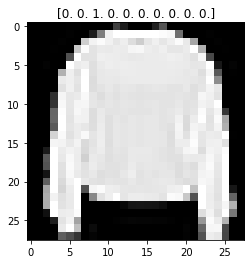

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
index = 7
plt.imshow(x_train[index], cmap="gray")
plt.title(str(y_train[index]))
plt.show

In [3]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Reshape((28, 28, 1), input_shape=(28, 28)))
model.add(layers.Conv2D(32, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

model.summary()

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0

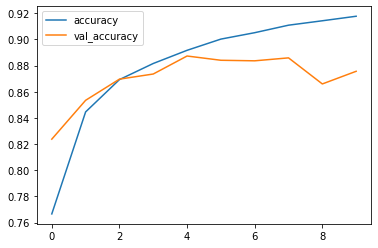

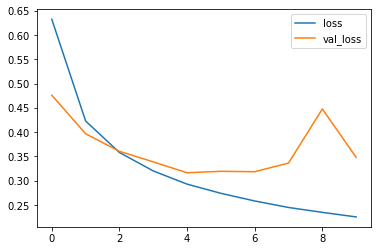

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()